In [7]:
!pip install ibm-cos-sdk | grep -v 'already satisfied'
!pip install ibm-cos-sdk
import ibm_boto3
from ibm_botocore.client import Config
import pandas as pd
import numpy as np
import io, datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler

'grep' is not recognized as an internal or external command,
operable program or batch file.


     --------------------------------------- 55.6/55.6 kB 55.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 956.8/956.8 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 135.7/135.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73910 sha256=c05532174ad17605e4dcdf1205cf4c3058e65e83134ca4366e3633685f40a738
  Stored in directory: c:\users\mm0692\appdata\local\pip\cache\wheels\31\8c\e6\9bd830e254449a64d3e3c8a79da6fb6bc940a19b165d76c3c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562947 sha256=c1ff5c841318dff9f6a489b60a16e452f94b2d33f5d53e69245456e5

In [ ]:
cos_credentials = {
  "apikey": "xqldavFSvp-xk-OHmGxh-_5KouWUxjoi-9ldTxLk6A_w",
  "cos_hmac_keys": {
    "access_key_id": "00762a997fa14acc98f3d903cf09101d",
    "secret_access_key": "06521556a6bbabc41f9ff836890db8b6c8e52086ac9458e6"
  },
  "endpoints": "https://control.cloud-object-storage.cloud.ibm.com/v2/endpoints",
  "iam_apikey_description": "Auto-generated for key crn:v1:bluemix:public:cloud-object-storage:global:a/c5148020ed1348e6a5283fe24f499b3c:ef856fcf-6199-4005-99ce-d690ba20d0f1:resource-key:00762a99-7fa1-4acc-98f3-d903cf09101d",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/c5148020ed1348e6a5283fe24f499b3c::serviceid:ServiceId-98c08caa-ea3b-46e3-bb2e-171533d2d1b8",
  "resource_instance_id": "crn:v1:bluemix:public:cloud-object-storage:global:a/c5148020ed1348e6a5283fe24f499b3c:ef856fcf-6199-4005-99ce-d690ba20d0f1::"
}


In [9]:
cos_credentials = {
  "apikey": "xqldavFSvp-xk-OHmGxh-_5KouWUxjoi-9ldTxLk6A_w",
  "cos_hmac_keys": {
    "access_key_id": "00762a997fa14acc98f3d903cf09101d",
    "secret_access_key": "06521556a6bbabc41f9ff836890db8b6c8e52086ac9458e6"
  },
  "endpoints": "https://control.cloud-object-storage.cloud.ibm.com/v2/endpoints",
  "iam_apikey_description": "Auto-generated for key crn:v1:bluemix:public:cloud-object-storage:global:a/c5148020ed1348e6a5283fe24f499b3c:ef856fcf-6199-4005-99ce-d690ba20d0f1:resource-key:00762a99-7fa1-4acc-98f3-d903cf09101d",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/c5148020ed1348e6a5283fe24f499b3c::serviceid:ServiceId-98c08caa-ea3b-46e3-bb2e-171533d2d1b8",
  "resource_instance_id": "crn:v1:bluemix:public:cloud-object-storage:global:a/c5148020ed1348e6a5283fe24f499b3c:ef856fcf-6199-4005-99ce-d690ba20d0f1::"
}

auth_endpoint = 'https://iam.cloud.ibm.com/oidc/token'
#cos://jp-tok/crudeoilpredict/Crude%20Oil%20Price%20Prediction.xlsx
service_endpoint = 'https://s3.jp-tok.cloud-object-storage.appdomain.cloud'
cos = ibm_boto3.client('s3',
                         ibm_api_key_id=cos_credentials['apikey'],
                        ibm_service_instance_id=cos_credentials['resource_instance_id'],
                         ibm_auth_endpoint=auth_endpoint,
                         config=Config(signature_version='oauth'),
                         endpoint_url=service_endpoint)
obj =cos.get_object(Bucket='crudeoilpredict', Key='Crude Oil Price Prediction.xlsx')
df = pd.read_excel(io.BytesIO(obj['Body'].read()), header=None, names=['date', 'price'] ,skiprows=1)
df.head()

,date,price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [10]:
df.isnull().any()

date     False
price     True
dtype: bool

In [11]:
df.dropna(axis=0,inplace=True)
df.isnull().any()

date     False
price    False
dtype: bool

In [12]:
df.shape

(8216, 2)

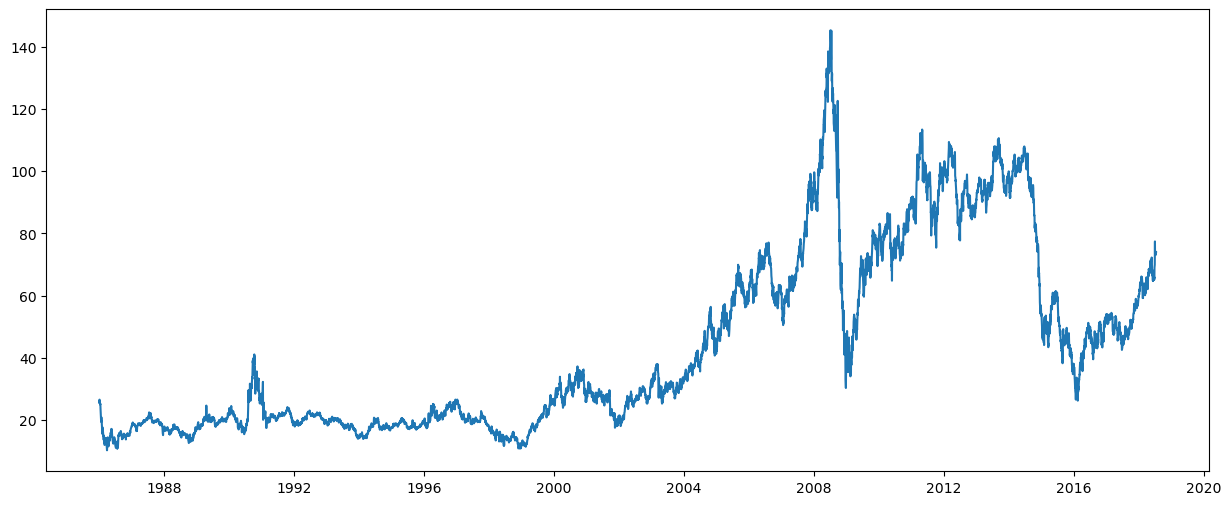

In [13]:
plot = plt.figure(figsize=(15, 6))
time = pd.to_datetime(df['date'])
price = list(df['price'])
data = pd.Series(price, time)
plt.plot(data)

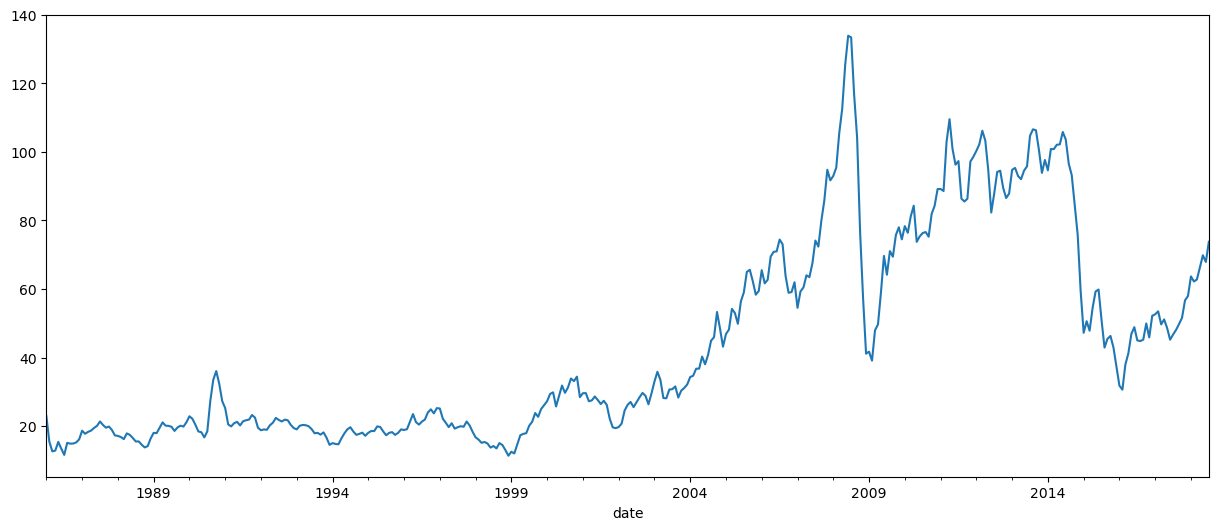

In [14]:
#Decompose the plot
df.set_index('date', inplace=True)
y = df['price'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

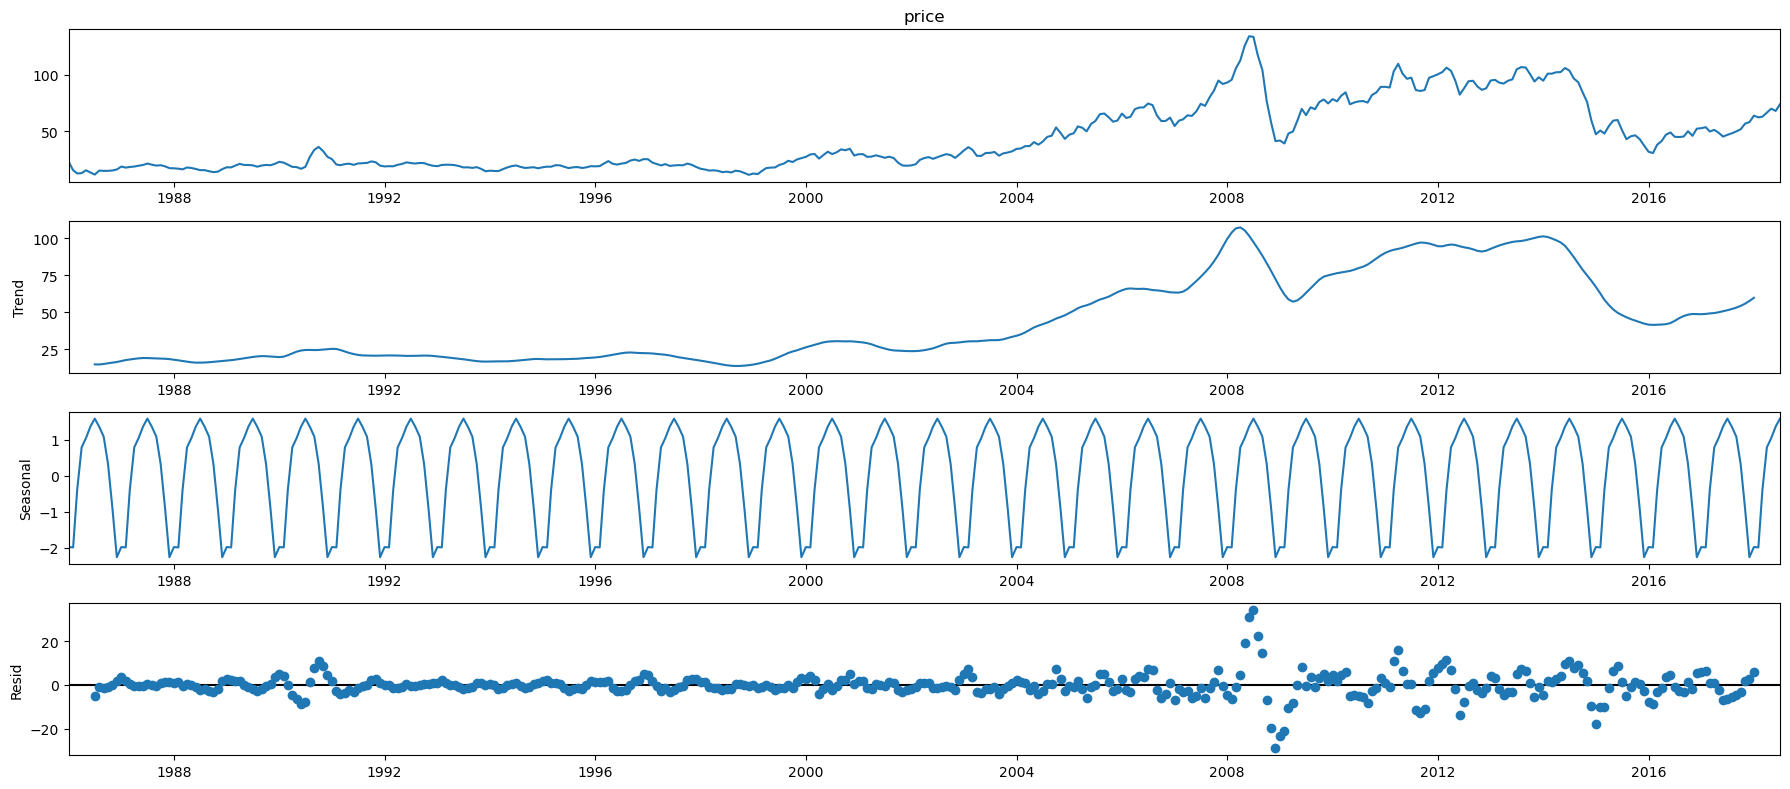

In [15]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Feature Scaling

In [16]:
df1 = df.reset_index()['price']
sc = MinMaxScaler(feature_range = (0, 1))
df1 = sc.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1.shape

(8216, 1)

## Train Test Split

In [18]:
train_size = int(len(df1) * 0.80)
test_size = len(df1) - train_size
train, test = df1[0:train_size, :], df1[train_size:len(df1), :]

In [19]:
len(test)

1644

Creating Window

In [20]:
def dataset(df, lookback=1):
    data_x, data_y = [], []
    for i in range(len(df) - lookback - 1):
        a = df[i:(i + lookback), 0]
        data_x.append(a)
        data_y.append(df[i + lookback, 0])
    return np.array(data_x), np.array(data_y)

time_step = 10
# Reshape into X=t and Y=t+1
X_train , Y_train = dataset(train,time_step)
X_test , Y_test = dataset(test,time_step)
# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [21]:
X_train.shape

(6561, 10, 1)

## Model  Building

Importing the Model building libraries

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Initializing the models
Adding LSTM Layers
Adding Output Layers

In [24]:
model = Sequential()
model.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(units = 10, return_sequences = True))
model.add(LSTM(units = 10))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 10)            480       
                                                                 
 lstm_1 (LSTM)               (None, 10, 10)            840       
                                                                 
 lstm_2 (LSTM)               (None, 10)                840       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 2,171
Trainable params: 2,171
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 1st LSTM Layer 
print(4 * 10 * (1 + 10 + 1))

480


In [26]:
# 2nd LSTM Layer 
parameters = 4 * 10 * (10 + 10 + 1)
print(parameters)

840


In [27]:
history = model.fit(X_train, Y_train, epochs = 30, batch_size = 64,validation_data=(X_test, Y_test),verbose=2)

Epoch 1/30
103/103 - 18s - loss: 0.0123 - val_loss: 6.0555e-04 - 18s/epoch - 175ms/step
Epoch 2/30
103/103 - 2s - loss: 5.0094e-04 - val_loss: 6.3489e-04 - 2s/epoch - 24ms/step
Epoch 3/30
103/103 - 2s - loss: 4.7311e-04 - val_loss: 7.8061e-04 - 2s/epoch - 24ms/step
Epoch 4/30
103/103 - 3s - loss: 4.5614e-04 - val_loss: 7.3856e-04 - 3s/epoch - 26ms/step
Epoch 5/30
103/103 - 3s - loss: 4.3838e-04 - val_loss: 5.2109e-04 - 3s/epoch - 26ms/step
Epoch 6/30
103/103 - 3s - loss: 4.2415e-04 - val_loss: 4.9208e-04 - 3s/epoch - 26ms/step
Epoch 7/30
103/103 - 3s - loss: 4.2111e-04 - val_loss: 5.5992e-04 - 3s/epoch - 25ms/step
Epoch 8/30
103/103 - 3s - loss: 4.2365e-04 - val_loss: 4.8715e-04 - 3s/epoch - 27ms/step
Epoch 9/30
103/103 - 3s - loss: 3.8584e-04 - val_loss: 4.7594e-04 - 3s/epoch - 27ms/step
Epoch 10/30
103/103 - 3s - loss: 3.9142e-04 - val_loss: 4.6647e-04 - 3s/epoch - 26ms/step
Epoch 11/30
103/103 - 3s - loss: 3.7512e-04 - val_loss: 4.4465e-04 - 3s/epoch - 26ms/step
Epoch 12/30
103/103 

Train the model

In [28]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

52/52 [==============================] - 0s 8ms/step


In [29]:
# invert predictions
train_predict = sc.inverse_transform(train_predict)
Y_train = sc.inverse_transform([Y_train])
test_predict = sc.inverse_transform(test_predict)
Y_test = sc.inverse_transform([Y_test])

Model Evaluation

In [30]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 1.2490269814589967
Train Root Mean Squared Error: 1.967562622171834
Test Mean Absolute Error: 1.7245216541091721
Test Root Mean Squared Error: 2.227473479250644


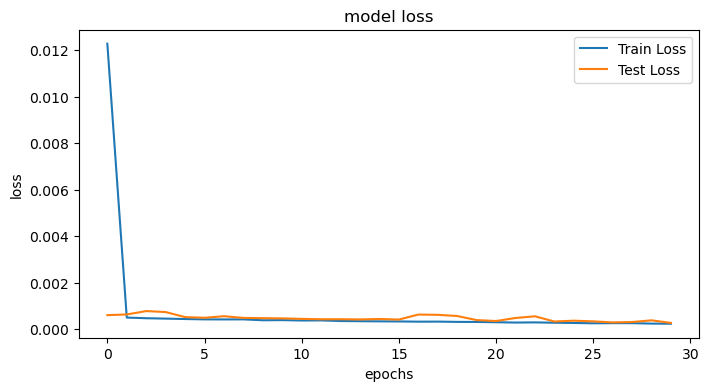

In [31]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

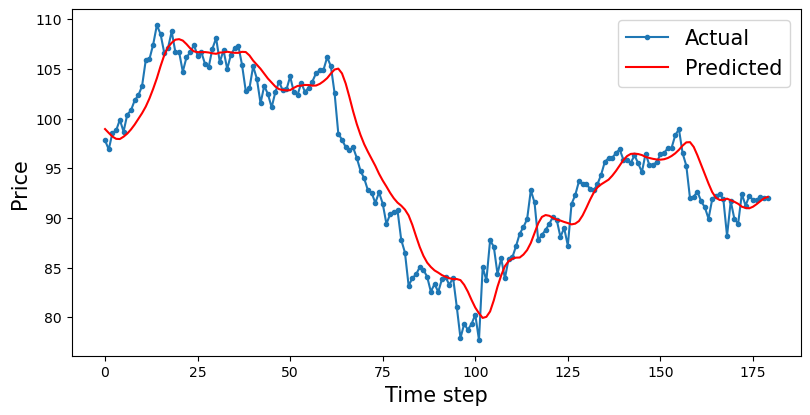

In [32]:
data = [i for i in range(180)]
plt.figure(figsize=(8,4))
plt.plot(data, Y_test[0][:180], marker='.', label="Actual")
plt.plot(data, test_predict[:,0][:180], 'r', label="Predicted")
plt.tight_layout()
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

Save the model

In [33]:
model.save("model.h5")
!tar -zcvf model.tgz model.h5

a model.h5


## IBM Watson Development

In [40]:
!pip install ibm_watson_machine_learning watson-machine-learning-client

     ---------------------------------------- 1.8/1.8 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 538.9/538.9 kB 3.8 MB/s eta 0:00:00
     -------------------------------------- 53.3/53.3 kB 915.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 913.9/913.9 kB 732.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 135.6/135.6 kB 803.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.11.0-py3-none-any.whl size=73641 sha256=b79a6a7bdbe48d84a0c5e6b3ed18e017c1ef13e268fc9e3d2ee7e4b0e41f409c
  Stored in directory: c:\users\mm0692\appdata\local\pip\cache\wheels\d3\a5\34\52d2e378d3d0446989ebcd214af8bad55beecf905258852b9f
  Cre

Test the model

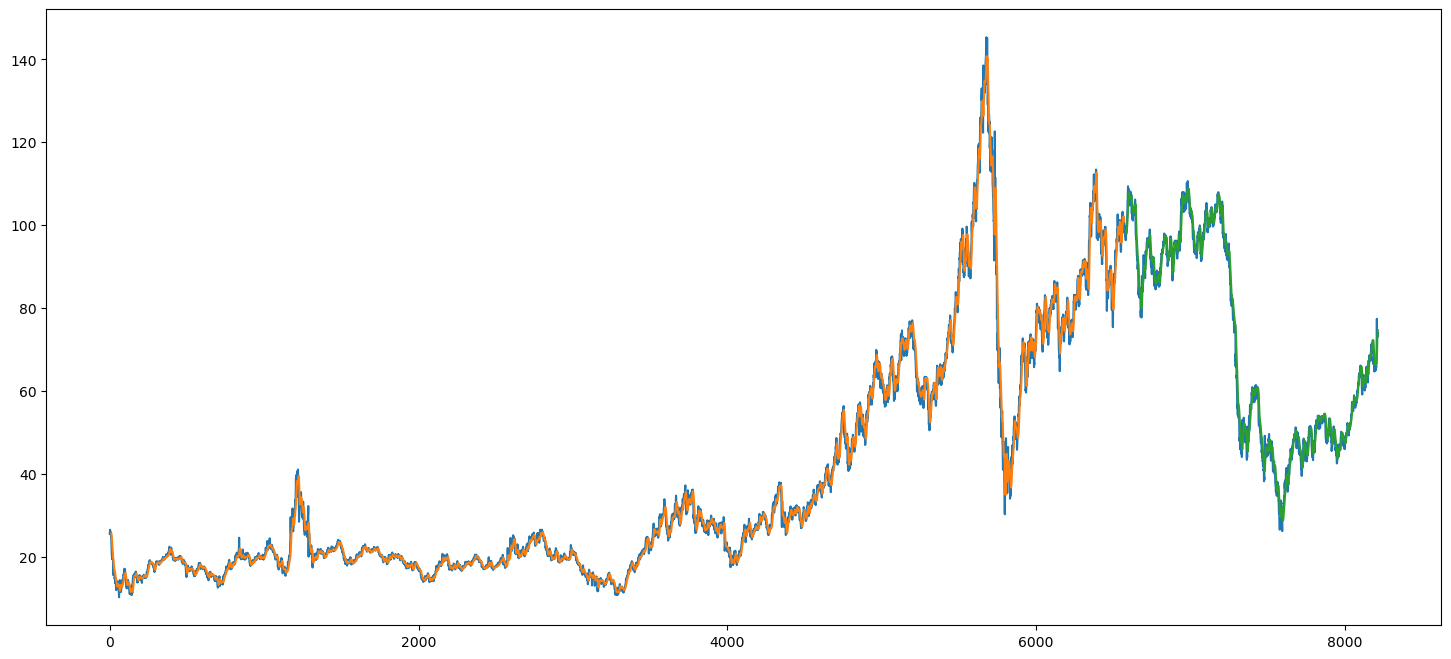

In [34]:
# Model Testing
look_back = 10
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
plt.plot(sc.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
x_input = test[len(test)-10:].reshape(1,-1)
x_input.shape

(1, 10)

In [36]:
temp_input = list(x_input[0])
temp_list = temp_input[0].tolist()

In [37]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [38]:
lst_output = []
n_steps = 10
i = 0
while(i<10):
  if(len(temp_input) > 10):
    x_input = np.array(temp_input[1:])
    print("Day {} Input {}".format(i,x_input),end="\n")
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose=0)
    print("Day {} Output {}".format(i,yhat),end="\n")
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    print("------------------------",end="\n")
    lst_output.extend(yhat.tolist())
    i = i+1
  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose=0)
    print("Day {} output {}".format(i,yhat),end="\n")
    temp_input.extend(yhat[0].tolist())
    lst_output.extend(yhat.tolist())
    i = i+1

Day 0 output [[0.47622982]]
Day 1 Input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.47622982]
Day 1 Output [[0.47517964]]
------------------------
Day 2 Input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.47622982 0.47517964]
Day 2 Output [[0.47520187]]
------------------------
Day 3 Input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.47622982 0.47517964 0.47520187]
Day 3 Output [[0.47622073]]
------------------------
Day 4 Input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.47622982 0.47517964 0.47520187 0.47622073]
Day 4 Output [[0.4771168]]
------------------------
Day 5 Input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.47622982
 0.47517964 0.47520187 0.47622073 0.47711679]
Day 5 Output [[0.47814116]]
------------------------
Day 6 Input [0.47341922 0.46497853 0.47038353 0.47149415 0.47622982 0.47517964
 0.4